The point of this project is an analysis of 'British Airways' reviews 

Collect 1000 reviews about British Airways

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | BA cancelled my flight home to...
1,"Not Verified | BA cancelled my flight home, t..."
2,✅ Trip Verified | Turned up 3.5 hours in advan...
3,Not Verified | Boarding – at gate at LGW they...
4,✅ Trip Verified | Missing baggage customer se...


In [4]:
df['reviews'][0]

'Not Verified |  BA cancelled my flight home to Heathrow on Dec 19th. On the face of it, that was sensible as the weather in Iceland was appalling. However, what was not acceptable was that the flight was cancelled only 4 hours before take off time by which time I was already struggling through dreadful driving conditions to get to the airport. I got nowhere near before the conditions became too bad. If they had taken advice they would have spared everyone the need to try and travel on roads that all ended up closed. I am now booked onto the flight on the 21st and downgraded for my sins. Having checked today, as I type they have not cancelled the flight on the 20th despite the road to Keflavík being closed! Do they not check these things? Any help from BA offered - not really.'

In [5]:
# let's leave only verified reviews
df_verified = df[~df['reviews'].str.contains('Not Verified')]
df_verified.head()

,reviews
2,✅ Trip Verified | Turned up 3.5 hours in advan...
4,✅ Trip Verified | Missing baggage customer se...
5,✅ Trip Verified | British Airways are not the...
6,✅ Trip Verified | Stupidly tried BA again aft...
8,✅ Trip Verified | Glasgow to London delayed b...


In [6]:
# and remove 'Trip Verified'
#print([review.replace('✅ Trip Verified | ', '') for review in df_verified['reviews']])
df_verified = pd.DataFrame([review.replace('✅ Trip Verified | ', '') for review in df_verified['reviews']])
df_verified.head()

,0
0,"Turned up 3.5 hours in advance, Terminal 5 at ..."
1,Missing baggage customer service was the wors...
2,British Airways are not the flag carrier they...
3,Stupidly tried BA again after a five year gap...
4,Glasgow to London delayed by 1 hour. My wife ...


In [7]:
# then remove stop-words and stem others
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
porter=PorterStemmer()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# and also remove all non-letters and non-numbers symbols
df_verified = df_verified.rename(columns = {0: 'reviews'})
df_verified['reviews'] = df_verified['reviews'].str.replace("[^A-Za-z0-9 ]", "")
df_verified['clear_reviews'] = df_verified['reviews'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split() if not word.lower() in (stop_words)]))
df_verified.head()

<ipython-input-8-68dba7951b51>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_verified['reviews'] = df_verified['reviews'].str.replace("[^A-Za-z0-9 ]", "")


,reviews,clear_reviews
0,Turned up 35 hours in advance Terminal 5 at Lo...,turn 35 hour advanc termin 5 london heathrow a...
1,Missing baggage customer service was the wors...,miss baggag custom servic worst ive ever exper...
2,British Airways are not the flag carrier they...,british airway flag carrier use checkin staff ...
3,Stupidly tried BA again after a five year gap...,stupidli tri ba five year gap paid 7000 wife g...
4,Glasgow to London delayed by 1 hour My wife a...,glasgow london delay 1 hour wife accept ba fli...


In [9]:
# unite all reviews into string (corpus)
corpus = ''
for item in df_verified['clear_reviews']:
    corpus += ' ' + item
corpus = corpus.replace('british airway', 'ba')
print(corpus)

 turn 35 hour advanc termin 5 london heathrow alreadi carnag 100 peopl tri check 5 desk man long queue secur due 4 line open peopl stress push shout flight delay 2 hour accord pilot delay due suitcas need load miss connect flight doha 12 hour wait til next one receiv voucher approx 6 whole day arriv 1 day later suitcas didnt arriv file claim desk 5 day updat inform offer compens solut offer spoilt holiday mani person belong gone xma gift miss extens expens dont know reimburs bewar ba expect low level zero custom servic old plane zero help anyth goe wrong miss person avoid ba futur cost miss baggag custom servic worst ive ever experienc arriv back phoenix sunday even air tag show bag arriv monday took three day final deliv understood due delay caus freez fog london luggag make onto final flight fill requir form phoenix airport attempt fill one onlin receiv messag say bag alreadi report miss enter track code sent via email email receiv made phone call daili told messag sent hear back wit

In [10]:
# find most frequent words with FreqDist
fdist = nltk.FreqDist(corpus.split())

In [11]:
print(fdist.most_common(20))

[('flight', 1689), ('ba', 1280), ('seat', 939), ('servic', 641), ('london', 587), ('time', 481), ('crew', 449), ('food', 446), ('hour', 396), ('class', 395), ('good', 394), ('cabin', 391), ('busi', 374), ('one', 368), ('board', 368), ('airlin', 345), ('staff', 342), ('get', 337), ('would', 316), ('offer', 285)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

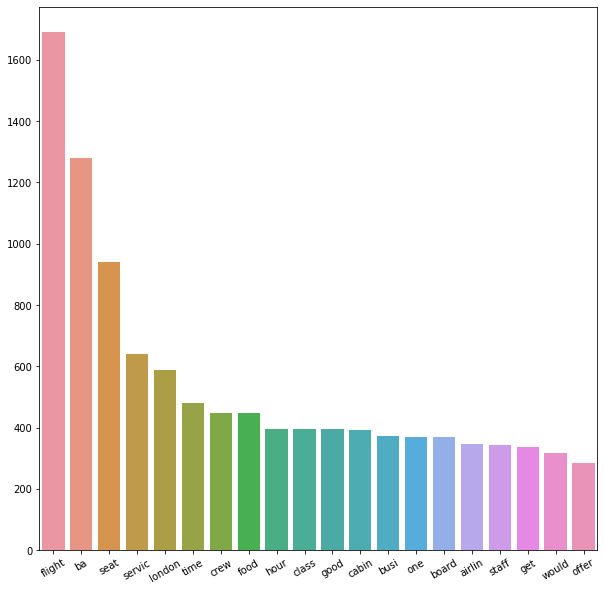

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(fdist.most_common(20)))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)

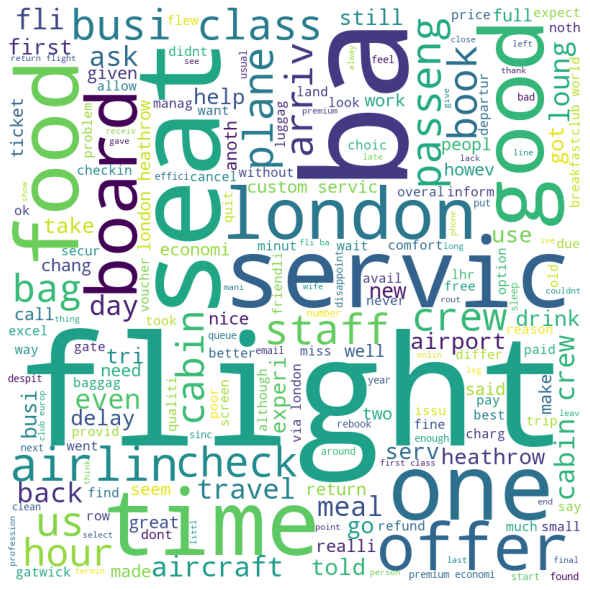

In [13]:
# frequent words can also be presented in word cloud
import wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(corpus)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Then, I'll find the most frequent combinations of words

In [14]:
def multiple_combinations(number_of_words, corpus):
  if (number_of_words > 4) or (number_of_words < 2):
    raise ValueError('Please, choose number out of 2,3 or 4')
  if number_of_words == 2:
    finder = nltk.collocations.BigramCollocationFinder.from_words(corpus.split())
  else:
    if number_of_words == 3:
      finder = nltk.collocations.TrigramCollocationFinder.from_words(corpus.split())
    else:
      if number_of_words == 4:
        finder = nltk.collocations.QuadgramCollocationFinder.from_words(corpus.split())
  find_dict = dict(finder.ngram_fd.most_common(20))
  find_dict_new = {}
  for key in find_dict.keys():
    find_dict_new[' '.join(key)] = find_dict[key]
  find = pd.Series(find_dict_new)
  fig, ax = plt.subplots(figsize=(18,10))
  all_plot = sns.barplot(x=find.index, y=find.values, ax=ax)
  plt.xticks(rotation=30)

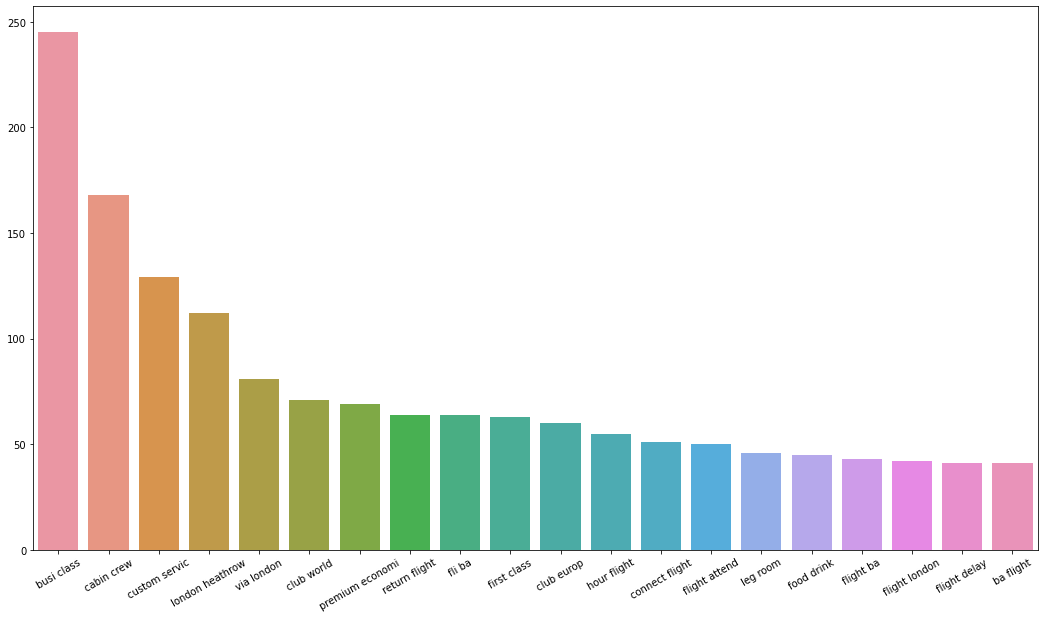

In [15]:
multiple_combinations(2, corpus)

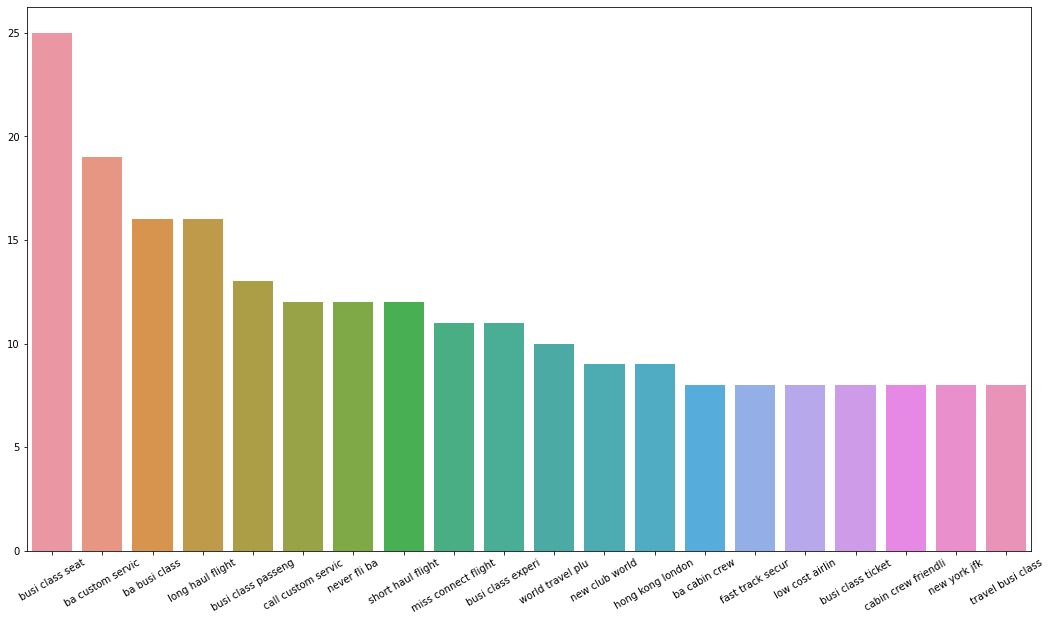

In [16]:
multiple_combinations(3, corpus)

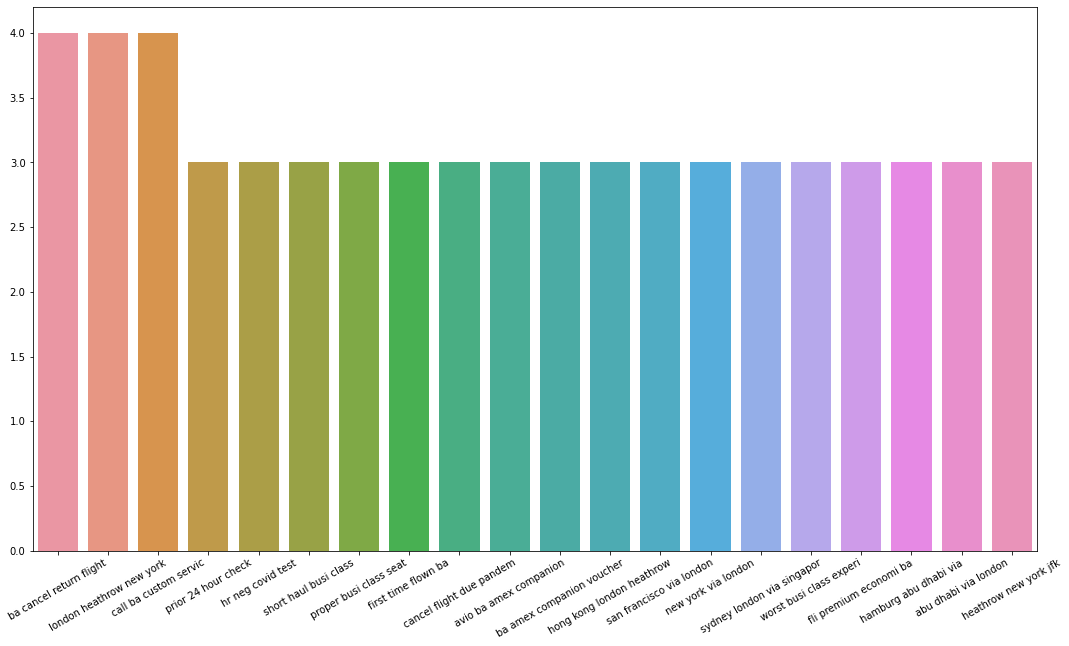

In [17]:
multiple_combinations(4, corpus)

Finally, I'll find the most similar words with 'ba', 'problem' and 'good'

In [18]:
import gensim
from gensim.models import Word2Vec
corpus_tokenize = df_verified['clear_reviews'].apply(gensim.utils.simple_preprocess)
model1 = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03)
model1.build_vocab(corpus_tokenize, progress_per=10000)
model1.train(corpus_tokenize, total_examples=model1.corpus_count, epochs=model1.epochs)

(51430, 314755)

In [19]:
print(model1)

Word2Vec(vocab=629, size=300, alpha=0.03)


In [20]:
model1.wv.most_similar(positive = ['ba'])

[('flight', 0.9992402791976929),
 ('seat', 0.999058723449707),
 ('servic', 0.9989442825317383),
 ('good', 0.9987685084342957),
 ('would', 0.9986029863357544),
 ('staff', 0.9985873103141785),
 ('food', 0.9985618591308594),
 ('offer', 0.9985418915748596),
 ('arriv', 0.9984451532363892),
 ('hour', 0.9984442591667175)]

In [21]:
model1.wv.most_similar(positive = ['problem'])

[('flight', 0.9966731667518616),
 ('ba', 0.9965841174125671),
 ('servic', 0.9965033531188965),
 ('seat', 0.996292233467102),
 ('arriv', 0.9962821006774902),
 ('staff', 0.9960771799087524),
 ('good', 0.996063768863678),
 ('get', 0.9960343241691589),
 ('london', 0.9960275888442993),
 ('would', 0.9960074424743652)]

In [22]:
model1.wv.most_similar(positive = ['good'])

[('flight', 0.9989588856697083),
 ('ba', 0.9987685084342957),
 ('seat', 0.9986715912818909),
 ('servic', 0.9985135793685913),
 ('offer', 0.9982336759567261),
 ('hour', 0.9982138872146606),
 ('staff', 0.9981809258460999),
 ('arriv', 0.9981331825256348),
 ('one', 0.9981310367584229),
 ('food', 0.9981279373168945)]